In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,IsolationForest
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,accuracy_score, f1_score
from sklearn import metrics 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB

In [2]:
df = pd.read_csv(r"C:\Users\ANSH VASHIST\Downloads\Research\new\new\data.csv")

In [3]:
df.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [6]:
"""scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:, :-1].values)
y = df.iloc[:, -1].values"""

In [4]:
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=321)

In [6]:
models = dict()
models['Logistic Regression'] = LogisticRegression(max_iter=1000)
models['XGB']= XGBClassifier(n_estimators=500)
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['Decision Tree'] = DecisionTreeClassifier(max_depth=100)
models['Random Forest'] = RandomForestClassifier()
models['kNN'] = KNeighborsClassifier()
models['SGD']=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)
models['adaBoost']=AdaBoostClassifier(n_estimators=100, random_state=321)
models["GNB"]=GaussianNB()
models["MNB"]=MultinomialNB()
models["CNB"]=ComplementNB()
models['GradBoost']=GradientBoostingClassifier(n_estimators=100, learning_rate=0.001,max_depth=1, random_state=321)
for model in models:
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Logistic Regression model fitting completed.
XGB model fitting completed.
Support Vector Machine model fitting completed.
Decision Tree model fitting completed.
Random Forest model fitting completed.
kNN model fitting completed.
SGD model fitting completed.
adaBoost model fitting completed.
GNB model fitting completed.
MNB model fitting completed.
CNB model fitting completed.
GradBoost model fitting completed.


Test Set Prediction:

--------------------Logistic Regression--------------------
              precision    recall  f1-score   support

           0    0.86207   0.96154   0.90909        26
           1    0.95833   0.85185   0.90196        27

    accuracy                        0.90566        53
   macro avg    0.91020   0.90670   0.90553        53
weighted avg    0.91111   0.90566   0.90546        53



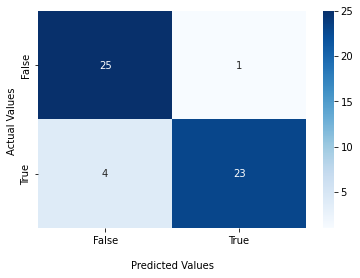

--------------------XGB--------------------
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        26
           1    1.00000   1.00000   1.00000        27

    accuracy                        1.00000        53
   macro avg    1.00000   1.00000   1.00000        53
weighted avg    1.00000   1.00000   1.00000        53



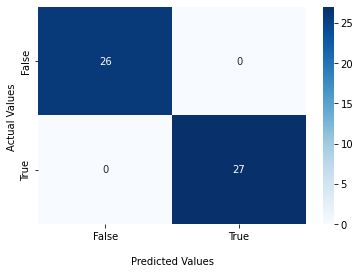

--------------------Support Vector Machine--------------------
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        26
           1    0.48000   0.88889   0.62338        27

    accuracy                        0.45283        53
   macro avg    0.24000   0.44444   0.31169        53
weighted avg    0.24453   0.45283   0.31757        53



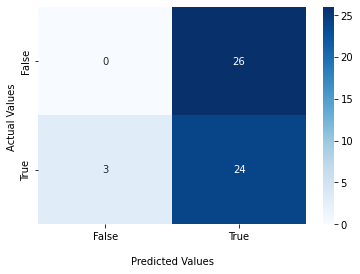

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0    0.81481   0.84615   0.83019        26
           1    0.84615   0.81481   0.83019        27

    accuracy                        0.83019        53
   macro avg    0.83048   0.83048   0.83019        53
weighted avg    0.83078   0.83019   0.83019        53



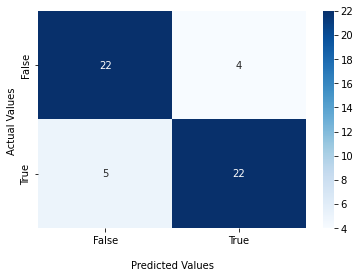

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0    1.00000   0.80769   0.89362        26
           1    0.84375   1.00000   0.91525        27

    accuracy                        0.90566        53
   macro avg    0.92188   0.90385   0.90444        53
weighted avg    0.92040   0.90566   0.90464        53



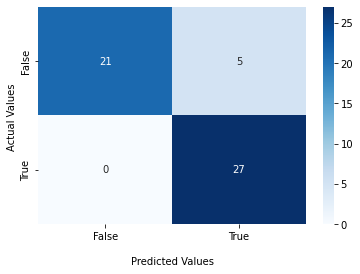

--------------------kNN--------------------
              precision    recall  f1-score   support

           0    0.71429   0.96154   0.81967        26
           1    0.94444   0.62963   0.75556        27

    accuracy                        0.79245        53
   macro avg    0.82937   0.79558   0.78761        53
weighted avg    0.83154   0.79245   0.78701        53



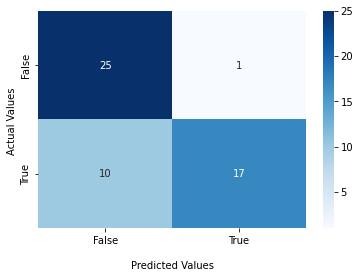

--------------------SGD--------------------
              precision    recall  f1-score   support

           0    1.00000   0.76923   0.86957        26
           1    0.81818   1.00000   0.90000        27

    accuracy                        0.88679        53
   macro avg    0.90909   0.88462   0.88478        53
weighted avg    0.90738   0.88679   0.88507        53



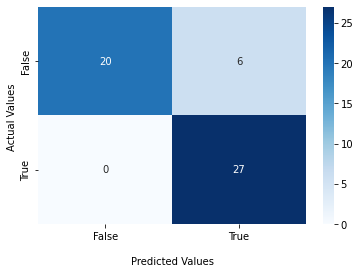

--------------------adaBoost--------------------
              precision    recall  f1-score   support

           0    1.00000   0.88462   0.93878        26
           1    0.90000   1.00000   0.94737        27

    accuracy                        0.94340        53
   macro avg    0.95000   0.94231   0.94307        53
weighted avg    0.94906   0.94340   0.94315        53



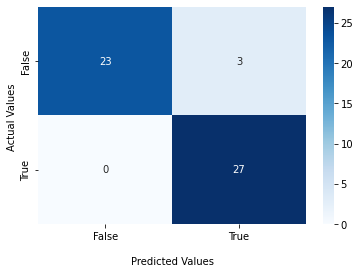

--------------------GNB--------------------
              precision    recall  f1-score   support

           0    1.00000   0.80769   0.89362        26
           1    0.84375   1.00000   0.91525        27

    accuracy                        0.90566        53
   macro avg    0.92188   0.90385   0.90444        53
weighted avg    0.92040   0.90566   0.90464        53



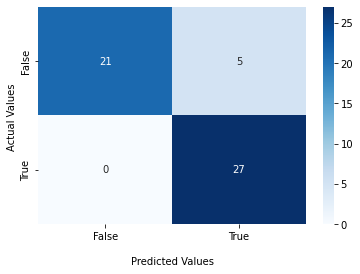

--------------------MNB--------------------
              precision    recall  f1-score   support

           0    1.00000   0.19231   0.32258        26
           1    0.56250   1.00000   0.72000        27

    accuracy                        0.60377        53
   macro avg    0.78125   0.59615   0.52129        53
weighted avg    0.77712   0.60377   0.52504        53



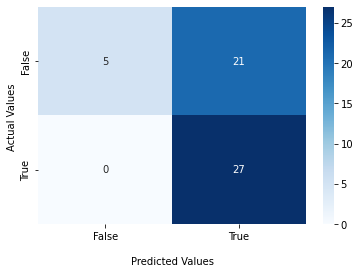

--------------------CNB--------------------
              precision    recall  f1-score   support

           0    1.00000   0.19231   0.32258        26
           1    0.56250   1.00000   0.72000        27

    accuracy                        0.60377        53
   macro avg    0.78125   0.59615   0.52129        53
weighted avg    0.77712   0.60377   0.52504        53



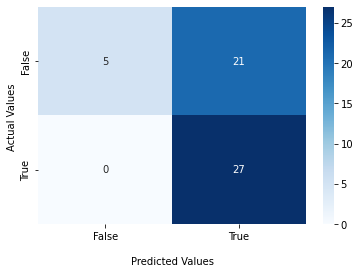

--------------------GradBoost--------------------
              precision    recall  f1-score   support

           0    0.88000   0.84615   0.86275        26
           1    0.85714   0.88889   0.87273        27

    accuracy                        0.86792        53
   macro avg    0.86857   0.86752   0.86774        53
weighted avg    0.86836   0.86792   0.86783        53



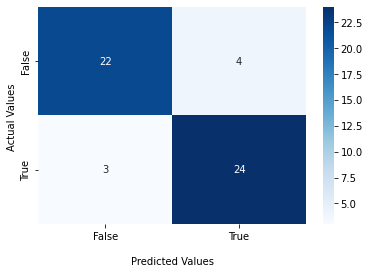

In [7]:
print("Test Set Prediction:\n")
for x in models:
    print('-'*20+x+'-'*20)
    y_pred = models[x].predict(x_test)
    print(classification_report(y_test, y_pred,digits=5))
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

--------------------VotingClassifier--------------------
              precision    recall  f1-score   support

           0    0.96154   0.96154   0.96154        26
           1    0.96296   0.96296   0.96296        27

    accuracy                        0.96226        53
   macro avg    0.96225   0.96225   0.96225        53
weighted avg    0.96226   0.96226   0.96226        53



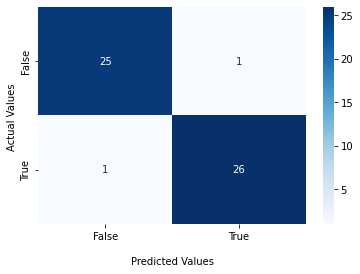

In [8]:
LogisticRegression(class_weight='balanced')
logistic_regression = LogisticRegression(max_iter=5000);
RF=RandomForestClassifier()
XGB= XGBClassifier(n_estimators=1000)
model = VotingClassifier (estimators=[('lr',logistic_regression), ('RF',RF),('XGB',XGB)], voting='soft')
model.fit(x_train, y_train);
y_pred = model.predict(x_test);
x='VotingClassifier'
print('-'*20+x+'-'*20)
print(classification_report(y_test, y_pred,digits=5))
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [9]:
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(x_train,y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

--------------------MultinomialNB--------------------
              precision    recall  f1-score   support

         0.0    0.83333   0.76923   0.80000        26
         1.0    0.79310   0.85185   0.82143        27

    accuracy                        0.81132        53
   macro avg    0.81322   0.81054   0.81071        53
weighted avg    0.81284   0.81132   0.81092        53



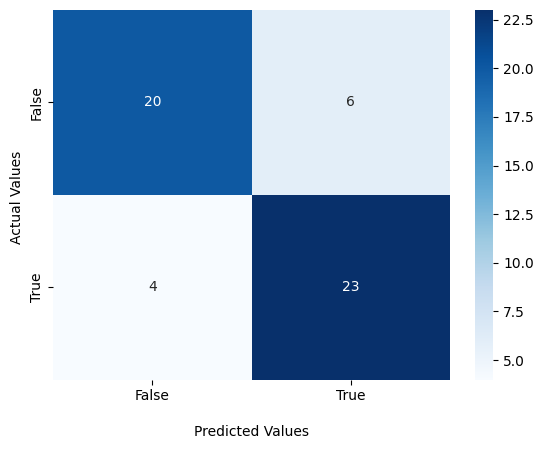

In [22]:
print('-'*20+"MultinomialNB"+'-'*20)
y_pred = p.predict(x_test)
print(classification_report(y_test, y_pred,digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [23]:
Mnp = Pipeline([('Normalizing',MinMaxScaler()),('ComplementNB',ComplementNB())])
Mnp.fit(x_train,y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('ComplementNB', ComplementNB())])

In [10]:
print('-'*20+"Complement NB"+'-'*20)
y_pred = Mnp.predict(x_test)
print(classification_report(y_test, y_pred,digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

--------------------Complement NB--------------------


NameError: name 'Mnp' is not defined

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, Nadam, RMSprop, SGD

model = Sequential()
model.add(Dense(64, input_dim=450, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                28864     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [68]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("Ansh_best_model_weights.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

model.fit(x_train, y_train, epochs=1000, verbose=1,validation_data=(x_test, y_test),callbacks=[checkpoint])

Epoch 1/1000


1/4 [======>.......................] - ETA: 3s - loss: 34292.5391 - accuracy: 0.6250
Epoch 1: val_accuracy improved from -inf to 0.64151, saving model to Ansh_best_model_weights.h5
4/4 [==============================] - 1s 73ms/step - loss: 44681.0586 - accuracy: 0.5124 - val_loss: 3089.8560 - val_accuracy: 0.6415
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 32099.9668 - accuracy: 0.5938
Epoch 2: val_accuracy did not improve from 0.64151
4/4 [==============================] - 0s 14ms/step - loss: 30806.7949 - accuracy: 0.5372 - val_loss: 3680.9641 - val_accuracy: 0.6038
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 24057.4688 - accuracy: 0.4688
Epoch 3: val_accuracy did not improve from 0.64151
4/4 [==============================] - 0s 14ms/step - loss: 17806.0918 - accuracy: 0.5124 - val_loss: 3674.1194 - val_accuracy: 0.6038
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 18935.9102 - accuracy: 0.5312
Epoch 4: val_accur

c:\Users\Aditya Joshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_accuracy did not improve from 0.64151
4/4 [==============================] - 0s 15ms/step - loss: 22445.5352 - accuracy: 0.4215 - val_loss: 2344.3450 - val_accuracy: 0.5849
Epoch 6/1000
1/4 [======>.......................] - ETA: 0s - loss: 6336.7998 - accuracy: 0.5312
Epoch 6: val_accuracy did not improve from 0.64151
4/4 [==============================] - 0s 14ms/step - loss: 12011.1533 - accuracy: 0.5455 - val_loss: 1891.0729 - val_accuracy: 0.5849
Epoch 7/1000
1/4 [======>.......................] - ETA: 0s - loss: 10965.4170 - accuracy: 0.4375
Epoch 7: val_accuracy did not improve from 0.64151
4/4 [==============================] - 0s 12ms/step - loss: 9731.0391 - accuracy: 0.4463 - val_loss: 1459.8529 - val_accuracy: 0.5849
Epoch 8/1000
1/4 [======>.......................] - ETA: 0s - loss: 4211.1045 - accuracy: 0.5312
Epoch 8: val_accuracy did not improve from 0.64151
4/4 [==============================] - 0s 14ms/step - loss: 7376.6748 - accuracy: 0.4959 - val_loss

2/2 [==============================] - 0s 2ms/step
--------------------ANN--------------------
              precision    recall  f1-score   support

         0.0    0.71429   0.76923   0.74074        26
         1.0    0.76000   0.70370   0.73077        27

    accuracy                        0.73585        53
   macro avg    0.73714   0.73647   0.73575        53
weighted avg    0.73757   0.73585   0.73566        53



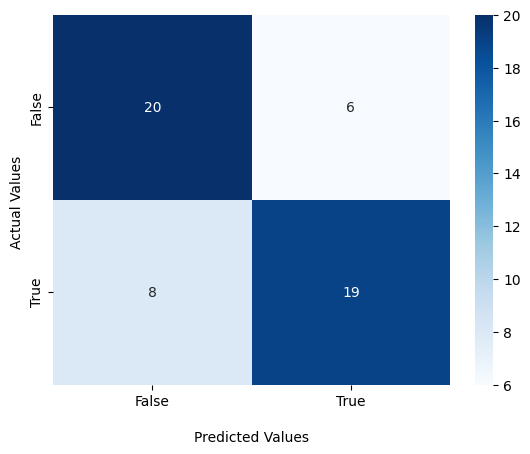

In [69]:
model.load_weights("Ansh_best_model_weights.h5")
y_pred = model.predict(x_test)
y_pred = y_pred.round()
print('-'*20+"ANN"+'-'*20)
print(classification_report(y_test, y_pred,digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()